(10000, 2) (10000,)
4346.264779152365
148.70672276805348
142.9649362310784
141.54530307157364
141.06031965930805
140.87031585891611
140.79025912753812
140.75505002269915
140.73914503180953
140.73183498915876
(自己写的)逻辑回归的参数w, b分别为:  [-5.03280465  8.24664683] -14.01785649748942
(sklearn)逻辑回归的参数w, b分别为:  [[-5.05902155  8.28959202]] [-14.09231079]


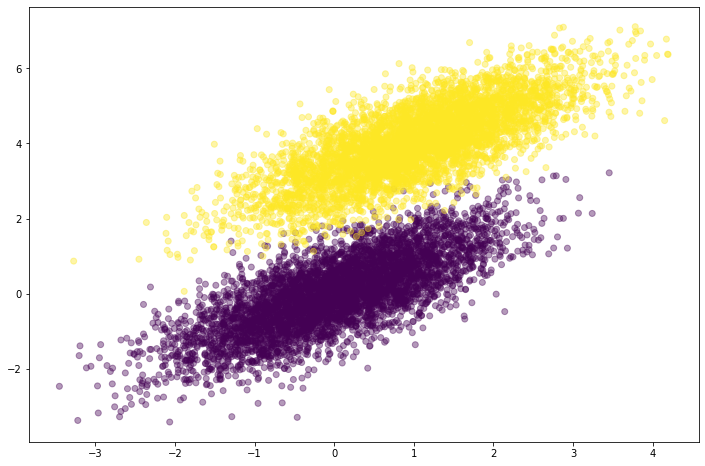

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 随机生成样本数据。 二分类问题，每一个类别生成5000个样本数据
np.random.seed(12)
num_observations = 5000


x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
X=np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

print (X.shape, y.shape)

# 数据的可视化
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = .4)

# 实现sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 计算log likelihood
def log_likelihood(X, y, w, b):
    """
    针对于所有的样本数据，计算（负的）log likelihood，也叫做cross-entropy loss
    这个值越小越好
    X: 训练数据（特征向量）， 大小为N * D
    y: 训练数据（标签），一维的向量，长度为D
    w: 模型的参数， 一维的向量，长度为D
    b: 模型的偏移量，标量
    """

    # 首先按照标签来提取正样本和负样本的下标
    pos, neg = np.where(y==1), np.where(y==0)  

    # 对于正样本计算 loss, 这里我们使用了matrix operation。 如果把每一个样本都循环一遍效率会很低。 
    pos_sum = np.sum(np.log(sigmoid(np.dot(X[pos], w)+b)))

    # 对于负样本计算 loss
    neg_sum = np.sum(np.log(1-sigmoid(np.dot(X[neg], w)+b)))

    # 返回cross entropy loss
    return -(pos_sum + neg_sum)

# 实现逻辑回归模型
def logistic_regression(X, y, num_steps, learning_rate):
    """
    基于梯度下降法实现逻辑回归模型
    X: 训练数据（特征向量）， 大小为N * D
    y: 训练数据（标签），一维的向量，长度为D
    num_steps: 梯度下降法的迭代次数
    learning_rate: 步长
    如果对于这块不是很熟悉，建议再看一下梯度下降法的推导视频 ^^
    """
    w, b = np.zeros(X.shape[1]), 0
    for step in range(num_steps):
        # 预测值与真实值之间的误差。 
        error = sigmoid(np.dot(X,w)+b) - y
        # 对于w, b的梯度计算
        grad_w = np.matmul(X.T, error)
        grad_b = np.sum(error)

        # 对于w, b的梯度更新
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

        # 每隔一段时间，计算一下log likelihood，看看有没有变化
        # 正常情况下， 它会慢慢变小，最后收敛
        if step % 10000 == 0:
            print (log_likelihood(X, y, w, b))

    return w,b

w, b = logistic_regression(X, y, num_steps = 100000, learning_rate = 5e-5)
print ("(自己写的)逻辑回归的参数w, b分别为: ", w, b)


# 这里我们直接调用sklearn的模块来训练，看看跟自己手写的有没有区别。如果结果一样就说明是正确的！ 
from sklearn.linear_model import LogisticRegression

# C设置一个很大的值，意味着不想加入正则项 （在第七章会看到正则作用，这里就理解成为了公平的比较）
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X, y)

print ("(sklearn)逻辑回归的参数w, b分别为: ", clf.coef_, clf.intercept_, )

